### HR Employee Attrition dataset (https://www.kaggle.com/datasets/saurabhbadole/hr-employee-attrition) 
#### This is a historical Employee Data with a number of features about each employee. This dataset provides information on employees within an organization, including their demographics, job-related factors, and attrition status. Dataset has 35 columns and 1470 rows. This is a classification dataset and I will perfom logistic regression machine learning model here.

In [137]:
# Needed imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [138]:
# load the dataset:
df = pd.read_csv("HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Target variable - "Attrition" column (show how likely someone is to quit), it has binary yes/no values. Here are a lot of other variables. I will choose support variable base on correlation to "Attrition" column. First, I will clean up the dataset:

### Cleaning up the dataset:

In [ ]:
# checking for dublicates,
# No duplicates.
df.duplicated().sum()

0

In [140]:
# no missing values:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [141]:
# checking target variable.
# only yes/no values. I will use LabelEncoder to converts the value of column to 0 or 1.
# just before LabelEncoder I will check other variable that may also need that, so I can encoder all at once.
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [142]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [143]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [144]:
# some columns are not related to attrition: "Over18" - all employees are adults, "EmployeeNumber" - not usefull, 
# "EmployeeCount" - constant value for this dataset;"EducationField" and "Department" - column is categorical, 
# they can be usefull but we have enough other options for support variable; The "Education" column is a numerical
# feature that represents education level, but it may not strongly influence attrition compared to salary orjob satisfaction.
# "MaritalStatus"- does not relate to attrition, "OverTime" - Indicates if the employee works overtime, i think it doesn't relate to attrition.
#  I will drop those columns:

columns_to_drop = [
    'Over18',
    'EmployeeCount',
    'EmployeeNumber',
    'Department',
    'EducationField',
    "Education",
    "MaritalStatus",
    "OverTime"
]

df = df.drop(columns_to_drop, axis=1)

In [145]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,1,2,Female,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,8,3,Male,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,4,Male,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,3,4,Female,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,2,1,Male,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [146]:
# now the dataset has three columns with categorical values: "BusinessTravel", "JobRole" and "Gender" not counting target column.
# let's check "BusinessTravel" column. It has three different values, I will keep it and convert categories into numerical form
# using one-hot encoded. I kept this variable because frequent business travel is often associated with higher attrition due to stress and job demands.

df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [147]:
# use of OneHotEncoder for "BusinessTravel" column , it will create multiple columns with numeric values:
from sklearn.preprocessing import OneHotEncoder
variables = ["BusinessTravel"]
             
# use encoder:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [148]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,Yes,1102,1,2,Female,94,3,2,Sales Executive,...,8,0,1,6,4,0,5,0,0,1
1,49,No,279,8,3,Male,61,2,2,Research Scientist,...,10,3,3,10,7,1,7,0,1,0
2,37,Yes,1373,2,4,Male,92,2,1,Laboratory Technician,...,7,3,3,0,0,0,0,0,0,1
3,33,No,1392,3,4,Female,56,3,1,Research Scientist,...,8,3,3,8,7,3,0,0,1,0
4,27,No,591,2,1,Male,40,3,1,Laboratory Technician,...,6,3,3,2,2,2,2,0,0,1


In [149]:
# next we will remove one new boolean variable "BusinessTravel_Travel_Rarely" (since it's going to be represented
# by a straight line of zeroes)
df = df.drop("BusinessTravel_Travel_Rarely", axis=1)

In [150]:
df.head( )

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently
0,41,Yes,1102,1,2,Female,94,3,2,Sales Executive,...,0,8,0,1,6,4,0,5,0,0
1,49,No,279,8,3,Male,61,2,2,Research Scientist,...,1,10,3,3,10,7,1,7,0,1
2,37,Yes,1373,2,4,Male,92,2,1,Laboratory Technician,...,0,7,3,3,0,0,0,0,0,0
3,33,No,1392,3,4,Female,56,3,1,Research Scientist,...,0,8,3,3,8,7,3,0,0,1
4,27,No,591,2,1,Male,40,3,1,Laboratory Technician,...,1,6,3,3,2,2,2,2,0,0


In [151]:
# "JobRole" column. Job role can significantly impact attrition, but it has 9 different values - too many.
# I will drop this column.
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [152]:
# drop "JobRole" column: 
df = df.drop("JobRole", axis=1)

In [153]:
# "Gender" column, I will check unique options, should be just two but who knows...
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# now we will use LabelEncoder to converts the value of column to 0 or 1 for "Gender" and "Attrition" columns:
# 1- "Yes" and 0 - "No" for "Attrition" column

from sklearn.preprocessing import LabelEncoder
# list of all boolean variables we want to convert
variables = ['Gender', 'Attrition']

# initalize encoder and convert everything
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [155]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently
0,41,1,1102,1,2,0,94,3,2,4,...,0,8,0,1,6,4,0,5,0,0
1,49,0,279,8,3,1,61,2,2,2,...,1,10,3,3,10,7,1,7,0,1
2,37,1,1373,2,4,1,92,2,1,3,...,0,7,3,3,0,0,0,0,0,0
3,33,0,1392,3,4,0,56,3,1,3,...,0,8,3,3,8,7,3,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,6,3,3,2,2,2,2,0,0


In [156]:
# "StandardHours" column contains a single constant value (80) for all rows, it does not provide any useful information
# I will drop it.
df['StandardHours'].head(5)

0    80
1    80
2    80
3    80
4    80
Name: StandardHours, dtype: int64

In [157]:
df = df.drop("StandardHours", axis=1)

#### Now, all columns contain only numeric values. In total, there are 28 columns. Next, we will check the data distribution and correlation to decide which columns to keep for the logistic regression model.

### Visualising the Data.

<Axes: >

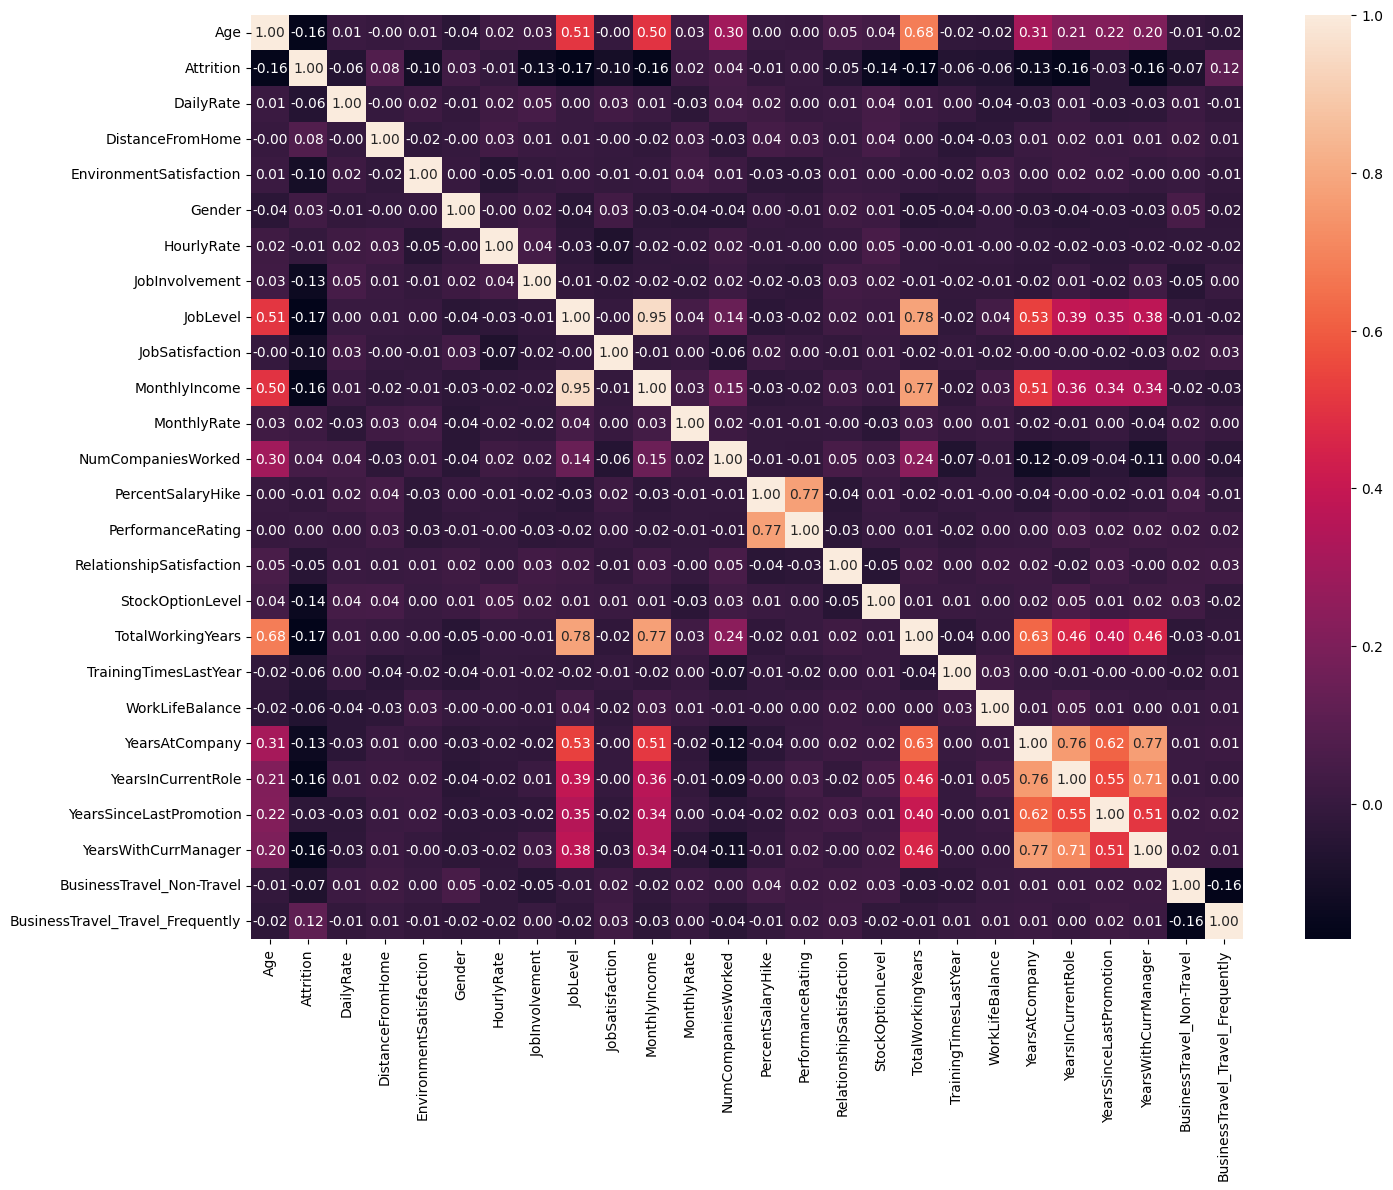

In [158]:
# it was difficult to see numbers, so we will increase the figure size:
plt.figure(figsize=(16, 12))

# on this correlation matrix we can see the most important supported variables:
# median_income. Also, "ocean_proximity_<1H OCEAN" variale correlate with out target variable and
# "ocean_proximity_INLAND" has negative correlation. 
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')

In [159]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently'],
      dtype='object')

##### Correlation matrix shows that there is no strong correlations with "Attrition" column. But we will keep columns that have weak correlation. 

In [160]:
# "Gender" - low correlation; "HourlyRate" - Similar to DailyRate, not needed if DailyRate is included; "MonthlyRate" - there is MonthlyIncome that i will keep for now;
# "RelationshipSatisfaction " -  less useful compared to JobSatisfaction;"DistanceFromHome" - low correlation rate;"PerformanceRating" - 0 correlation rate;
# "NumCompaniesWorked" - very low correlation rate;"PercentSalaryHike" - also too low correlation rate.

columns_to_drop_aftercorr = [
    'Gender',
    'HourlyRate',
    'MonthlyRate',
    'RelationshipSatisfaction',
    'DistanceFromHome',
    'PerformanceRating',
    'NumCompaniesWorked',
    'PercentSalaryHike'
]

df = df.drop(columns_to_drop_aftercorr, axis=1)


In [161]:
len(df.columns)

18

In [162]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently'],
      dtype='object')

##### After cleaning we have 17 support variables, that is a lot. It is good to check for multicollinearity as some columns has very strong correlations (like these: 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'). To implement multicollinearity (VIF-test) we need to define X/y first.

###  X/y -split + VIF -test

In [163]:
 # use everything else except, the target
X = df.drop("Attrition", axis=1)

# our target variable is y
y = df['Attrition']

In [164]:
# Finding columns with potential multicollinearity (VIF-test)
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression
print(vif_data)

                             feature        VIF
0                                Age  26.256503
1                          DailyRate   4.796366
2            EnvironmentSatisfaction   6.701236
3                     JobInvolvement  13.036970
4                           JobLevel  48.877574
5                    JobSatisfaction   6.567311
6                      MonthlyIncome  30.994836
7                   StockOptionLevel   1.881405
8                  TotalWorkingYears  13.345172
9              TrainingTimesLastYear   5.397656
10                   WorkLifeBalance  13.027862
11                    YearsAtCompany  10.011322
12                YearsInCurrentRole   6.397829
13           YearsSinceLastPromotion   2.440140
14              YearsWithCurrManager   6.440338
15         BusinessTravel_Non-Travel   1.151701
16  BusinessTravel_Travel_Frequently   1.268554


In [165]:
# Since many of these variables are highly correlated, we should keep only the most meaningful ones and drop the redundant ones. 
# Let's analyze them: 
# MonthlyIncome vs JobLevel highly correlated with eachother -> I will keep "JobLevel" column and drop "MonthlyIncome";
#  TotalWorkingYears vs YearsAtCompany -> keep TotalWorkingYears is it more informative; 
# Age (VIF = 26.26) vs. TotalWorkingYears (VIF = 13.35) -> TotalWorkingYears to keep; 
# WorkLifeBalance (VIF = 13.03) vs. JobSatisfaction & EnvironmentSatisfaction -> i will keep JobSatisfaction and EnvironmentSatisfaction.
# Let's drop not needed columns and check again VIF:

columns_to_drop_after_vif = [
    'Age',
    'MonthlyIncome',
    'WorkLifeBalance',
    'YearsAtCompany', 
]

df = df.drop(columns_to_drop_after_vif, axis=1)

In [166]:
 # use everything else except, the target
X = df.drop("Attrition", axis=1)

# our target variable is y
y = df['Attrition']

In [167]:
# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression
print(vif_data)

                             feature        VIF
0                          DailyRate   4.683169
1            EnvironmentSatisfaction   6.094110
2                     JobInvolvement  10.185975
3                           JobLevel  11.274059
4                    JobSatisfaction   6.081206
5                   StockOptionLevel   1.860528
6                  TotalWorkingYears   8.933278
7              TrainingTimesLastYear   4.996645
8                 YearsInCurrentRole   5.491723
9            YearsSinceLastPromotion   2.259100
10              YearsWithCurrManager   5.149800
11         BusinessTravel_Non-Travel   1.144331
12  BusinessTravel_Travel_Frequently   1.260666


In [168]:
# JobLevel correlate with TotalWorkingYears -> I will drop JobLevel column.
# JobInvolvement → It might be redundant with JobSatisfaction & EnvironmentSatisfaction, i will drop it too. 

df = df.drop(['JobLevel', 'JobInvolvement'], axis=1)

##### By having these support variable AUC score is 0.56, which is super low. I will delete also YearsInCurrentRole and EnvironmentSatisfaction columns and let's see if it will get better. 

In [169]:
df = df.drop(['YearsInCurrentRole', 'EnvironmentSatisfaction'], axis=1)

In [170]:
 # use everything else except, the target
X = df.drop("Attrition", axis=1)

# our target variable is y
y = df['Attrition']

In [171]:
# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression
print(vif_data)

                            feature       VIF
0                         DailyRate  4.083840
1                   JobSatisfaction  4.945766
2                  StockOptionLevel  1.818169
3                 TotalWorkingYears  3.901028
4             TrainingTimesLastYear  4.263644
5           YearsSinceLastPromotion  2.083023
6              YearsWithCurrManager  3.464499
7         BusinessTravel_Non-Travel  1.140489
8  BusinessTravel_Travel_Frequently  1.252778


##### VIF now looks better but still here are values > 5

### train/test -split, train model, metrics etc.

In [172]:
 # create train/test split with scikit-learn's helper function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scale the values

In [173]:
# initialize the scaler and process X-values
# IN MOST CASES you can experiment with MinMaxScaler 
# and StandardScaler, ONLY USE ONE SCALER AT A TIME
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# use fit_transform only once in the beginning
# and use transform after that everywhere
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Create logistic regression model

In [174]:
# code as usual
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Classification error metrics

In [175]:
# get the test predictions for metrics as usual
predictions = model.predict(X_test)

In [176]:
 # print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       367
           1       0.62      0.07      0.12        74

    accuracy                           0.84       441
   macro avg       0.73      0.53      0.52       441
weighted avg       0.80      0.84      0.78       441


Model overall accuracy: 83.67%


[[364   3]
 [ 69   5]]


<Axes: >

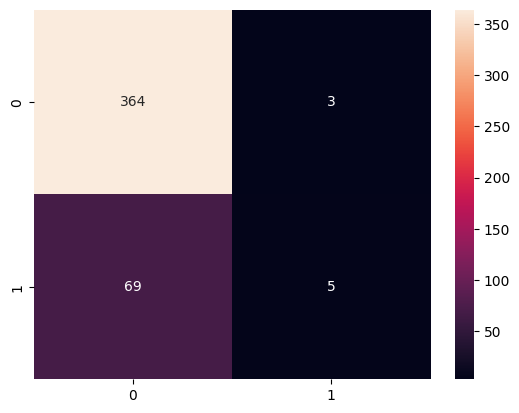

In [177]:
print(confusion_matrix(y_test, predictions))

# if you want a more graphical version of this, try:
# the fmt-parameter will change to decimal format from scientific format
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

#### very bad results here for class 1 -> 69 false cases and only 5 right. Class 0 -> 364 True cases and only 3 False. It means this model will rarely predicts class 1.

In [178]:
 # The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means, there's still something to optimize
# if this falls under 0.5, random guessing works better than this model
roc_auc_score(y, model.predict_proba(X.values)[:, 1])

0.5604867548875679

##### AUC = 0.6 - worthless. The result is not good but better than it was.

#### Testing the model:

In [179]:
df.columns

Index(['Attrition', 'DailyRate', 'JobSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently'],
      dtype='object')

In [180]:
df.head()

,Attrition,DailyRate,JobSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently
0,1,1102,4,0,8,0,0,5,0,0
1,0,279,2,1,10,3,1,7,0,1
2,1,1373,3,0,7,3,0,0,0,0
3,0,1392,3,0,8,3,3,0,0,1
4,0,591,2,1,6,3,2,2,0,0


In [181]:
tester_row = {
    'DailyRate': 1300, 
    'JobSatisfaction': 4, 
    'StockOptionLevel': 1,
    'TotalWorkingYears': 3, 
    'TrainingTimesLastYear': 3,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 1,
    'BusinessTravel_Non-Travel': 1,
    'BusinessTravel_Travel_Frequently': 0
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)


print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Did this employee quit? (Yes/No):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")


All probabilities by category:
[[0.93173289 0.06826711]]

Did this employee quit? (Yes/No):
No
-------------------


In this dataset "Attrition" column has only weak correlations with all the support variables that I have chosen. Probably, this is the reason why AUC score is so low. I will create one more model and will keep less support variable and also, will experiment with different solvers.

####